# AceleraDev Data Science - Codenation
# Desafio 3
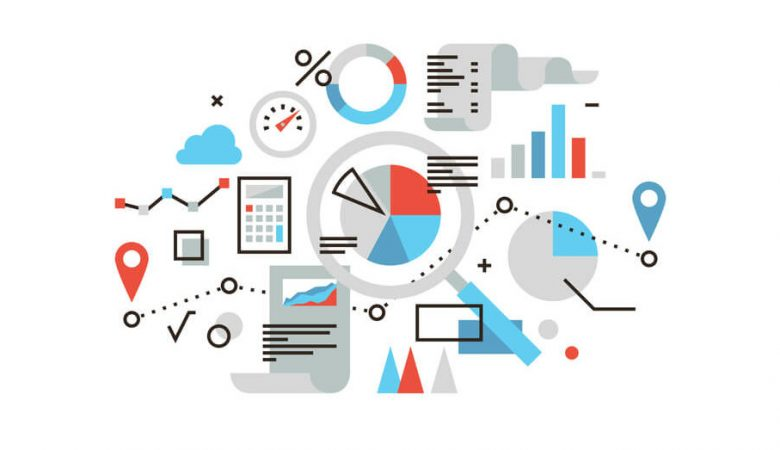

## Objetivo

Nesse desafio buscamos conhecer melhor nossa base de clientes. Pata tal, investigamos mais a fundo nossos clientes por estado. A partir disso, analisamos a pontuação de crédito dos clientes, com destaca para a média, a mediana, a moda e o desvio padrão dessa métrica. 

# Descrição dos dados:

* 'id': Identificador do cliente
* 'sobrenome': Sobrenome do cliente
* 'pontuacao_credito': Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente)
* 'estado_residencia': Estado de residência do cliente
* 'genero': Gênero do cliente
* 'nivel_estabilidade': Nível de estabilidade do cliente
* 'saldo_conta': Saldo disponível na conta do cliente
* 'numero_produtos': Número de produtos que o cliente consome
* 'possui_cartao_de_credito': Possui um cartão de crédito cadastrado
* 'membro_ativo': Membro acessa e consome frequentemente

# Setup

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [252]:
# Configurando os gráfico no centro da tela
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [253]:
credito = pd.read_csv('2.cartao_de_credito.csv', index_col='RowNumber')

In [3]:
credito.head()

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
RowNumber,,,,,,,,,,,
1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


# Visão geral

In [4]:
credito.shape

(7000, 11)

In [5]:
# Base não possui valores faltantes
credito.isna().sum()

id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [6]:
credito.dtypes

id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

In [7]:
# Base somente possui estados da Região Sul do Brasil
credito.estado_residencia.unique()

array(['SC', 'RS', 'PR'], dtype=object)

In [181]:
# Transformando as idades em faixas etárias
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
credito['faixa_etaria'] = pd.cut(credito.idade, bins, labels = labels,include_lowest = True)

# Análise Exploratória dos Dados (EAD)

Afim de realizar uma análise exploratória condizente com possíveis problemas de negócio, lançamos mão de algumas pergutas:
* Qual o estado que possui uma melhor média de saldo de conta dos clientes?
* Qual a distribuição da pontuação? e do saldo em conta?
* Qual a média de pontuação conforme gênero e faixa etária?
* A pontuação está relacionada com o saldo na conta do cliente?
* Ser um membro ativo está relacionado o nível de estabilidade do cliente?

### Qual o estado que possui uma melhor média de saldo de conta dos clientes?

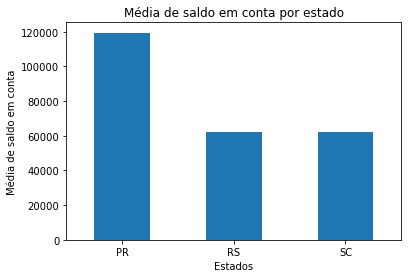

In [32]:
credito.groupby('estado_residencia')['saldo_conta'].mean().plot(kind='bar');
plt.xticks(rotation=0);
plt.title('Média de saldo em conta por estado');
plt.xlabel('Estados');
plt.ylabel('Média de saldo em conta');

In [56]:
# Saldo média por Estado
credito.groupby('estado_residencia')['saldo_conta'].mean()

estado_residencia
PR    119458.904945
RS     62169.610400
SC     62439.046206
Name: saldo_conta, dtype: float64

In [62]:
# Número de clientes por Estado
credito.groupby('estado_residencia')['saldo_conta'].count()

estado_residencia
PR    1731
RS    1750
SC    3519
Name: saldo_conta, dtype: int64

Podemos observar que o estado do Paraná é o que possui a maior média de saldo em conta entre os estados da base de dados. No entanto, vale checar mais a fundo esse indicador por meio da distribuição dos saldos de conta.

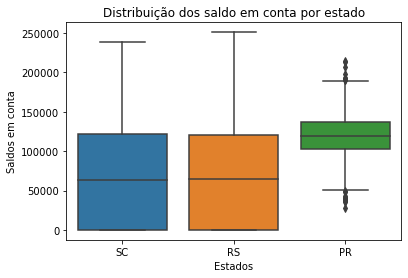

In [59]:
sns.boxplot(data=credito, y='saldo_conta', x= 'estado_residencia');
plt.title('Distribuição dos saldo em conta por estado');
plt.xlabel('Estados');
plt.ylabel('Saldos em conta');

Dessa forma, podemos perceber que a média dos saldos de conta do Paraná sofre o efeito de valores distoantes (outliers),tanto para cima quanto para baixo, diferentemente do que acontece nos outros estados, em que não se encontra valores distoantes. É curioso perceber que SC e RS possuem uma distribuição muito semelhante ainda que o primeiro tenha quase o dobro do número de clientes do segundo. 

### Qual a distribuição da pontuação? e do saldo em conta?

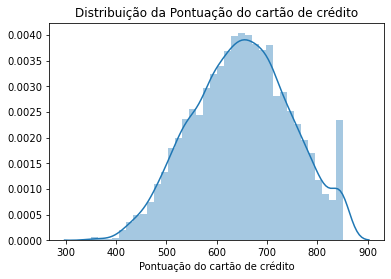

In [155]:
pontuacao = credito.pontuacao_credito
sns.distplot(a=pontuacao);
plt.xlabel('Pontuação do cartão de crédito');
plt.title('Distribuição da Pontuação do cartão de crédito');

In [152]:
# Calculando a assimetria
pontuacao.skew()

-0.046834946542205005

A pontuação do cartão de crédito segue uma distribuição com uma leve assimetria negativa, ou seja, a cauda esquerda é mais longa do que a cauda direita, o que indica que a mediana é maior do média da distribuição, como demonstrado à baixo. Vale constatar o número elevado de pontuações máxima (850).

In [156]:
pontuacao.median() > pontuacao.mean()

True

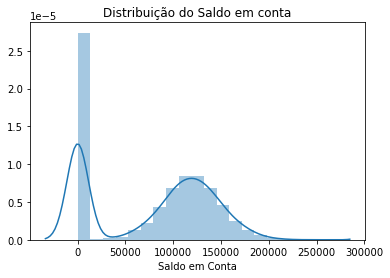

In [159]:
saldo = credito.saldo_conta
sns.distplot(a=saldo);
plt.xlabel('Saldo em Conta');
plt.title('Distribuição do Saldo em conta');

Esse gráfico é bastante ilustrativo. A distribuição dos saldos em conta  é marcado por uma quantidade grande de clientes que possui um saldo baixo (abaixo de 1000) ao passo que dispõe uma clientela também expressiva, mas mais distribuída, com cliente que detém entre 50 a 200 mil.

### Qual a média de pontuação conforme gênero e faixa etária?

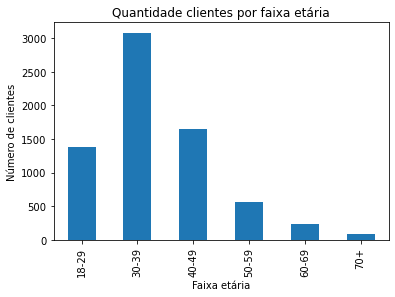

In [239]:
# Checando a clientela por faixa etária
credito.faixa_etaria.value_counts().sort_index().plot(kind='bar');
plt.title('Quantidade clientes por faixa etária');
plt.xlabel('Faixa etária');
plt.ylabel('Número de clientes');

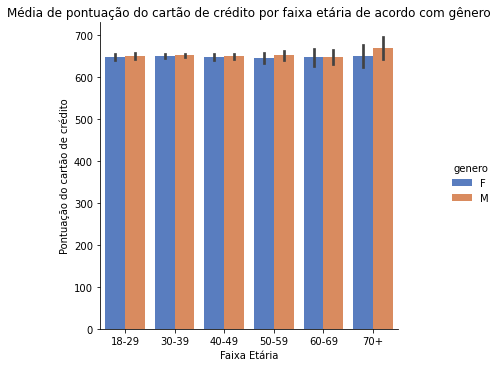

In [193]:
sns.catplot(x="faixa_etaria", y="pontuacao_credito", hue="genero", data=credito,
            kind="bar", palette="muted");
plt.title('Média de pontuação do cartão de crédito por faixa etária de acordo com gênero');
plt.xlabel('Faixa Etária');
plt.ylabel('Pontuação do cartão de crédito');

Em termos de perfil de clientes, é interessante destacar que todas as faixas etárias de cada gênero possuem uma média aproximada de pontuação no cartão de crédito.

### A pontuação está relacionada com o saldo na conta do cliente?

In [197]:
credito[['saldo_conta','pontuacao_credito']].corr()

,saldo_conta,pontuacao_credito
saldo_conta,1.000000,0.009761
pontuacao_credito,0.009761,1.000000


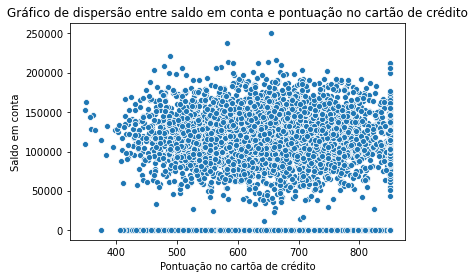

In [249]:
sns.scatterplot(data=credito,y='saldo_conta', x='pontuacao_credito');
plt.title('Gráfico de dispersão entre saldo em conta e pontuação no cartão de crédito');
plt.xlabel('Pontuação no cartõa de crédito');
plt.ylabel('Saldo em conta');

Como pode ser visto, a relação existente entre saldo em conta e pontuação não apresenta uma correlação estatisticamente significativa. Em outras palavras, não há indícios de que, ao se ter um maior saldo em conta, ter-se-á uma maior pontuação (ou vice-versa). Essa constatação evidencia que a empresa provavalmente adota outros critérios além do saldo em conta dos clientes para elaborar suas pontuações.

### Ser um membro ativo está relacionado o nível de estabilidade do cliente?

In [229]:
credito[['membro_ativo','nivel_estabilidade']].corr()

,membro_ativo,nivel_estabilidade
membro_ativo,1.00000,-0.02998
nivel_estabilidade,-0.02998,1.00000


Por não haver uma correlação estisticamente significativa, pode-se apontar que não se constata uma relação entre um cliente ser membro ativo e seu nível de estabilidade.

# Resolução do Desafio

### Desafio: quais os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset. 

In [8]:
media = credito.groupby('estado_residencia')['pontuacao_credito'].mean()
mediana = credito.groupby('estado_residencia')['pontuacao_credito'].median()
moda = credito.groupby('estado_residencia')['pontuacao_credito'].apply(lambda x: x.mode()[0])
desv =credito.groupby('estado_residencia')['pontuacao_credito'].std()

In [251]:
# Visualizando as respostas do desafio em dataframe
df = pd.DataFrame(data={'media':media, 'mediana':mediana, 'desvio_padrao':desv, 'moda':moda})
df

,media,mediana,desvio_padrao,moda
estado_residencia,,,,
PR,648.961294,650,98.607186,850
RS,651.105143,650,95.136598,850
SC,649.537653,653,97.233493,850


In [11]:
js = {"SC": {"moda": moda[2].item(), "mediana": mediana[2].item(), "media": media[2].item(), "desvio_padrao": desv[2].item()}, 
 "RS": {"moda": moda[1].item(), "mediana": mediana[1].item(), "media": media[1].item(), "desvio_padrao": desv[1].item()}, 
 "PR": {"moda": moda[0].item(), "mediana": mediana[0].item(), "media": media[0].item(), "desvio_padrao": desv[0].item()}}

In [255]:
# Salvando em arquivo json
with open('submission.json', 'w') as fp:
    json.dump(js, fp)

Referências:
* Sobre [serialização de arquivos JSON](https://thepythonguru.com/reading-and-writing-json-in-python/)